# Brain Stroke Prediction

## 1.Introduction
A stroke is a medical condition in which poor blood flow to the brain causes cell death.
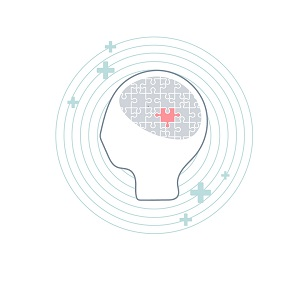
#### Dataset
- The dataset is obtained from [Kaggle](https://www.kaggle.com/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset?datasetId=2343381&sortBy=voteCount).
#### Context
- There are two main types of stroke: ischemic, due to lack of blood flow, and hemorrhagic, due to bleeding. Both cause parts of the brain to stop functioning properly. 
- Signs and symptoms of a stroke may include an inability to move or feel on one side of the body, problems understanding or speaking, dizziness, or loss of vision to one side. Signs and symptoms often appear soon after the stroke has occurred. 
- If symptoms last less than one or two hours, the stroke is a transient ischemic attack (TIA), also called a mini-stroke. A hemorrhagic stroke may also be associated with a severe headache. The symptoms of a stroke can be permanent. Long-term complications may include pneumonia and loss of bladder control.
- The main risk factor for stroke is high blood pressure. Other risk factors include high blood cholesterol, tobacco smoking, obesity, diabetes mellitus, a previous TIA, end-stage kidney disease, and atrial fibrillation.

#### Attribute Information
1) **gender**: "Male", "Female" or "Other"
2) **age**: age of the patient
3) **hypertension**: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
4) **heart_disease**: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
5) **ever_married**: "No" or "Yes"
6) **work_type**: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
7) **Residence_type**: "Rural" or "Urban"
8) **avg_glucose_level**: average glucose level in blood
9) **bmi**: body mass index
10) **smoking_status**: "formerly smoked", "never smoked", "smokes" or "Unknown"*
11) **stroke**: 1 if the patient had a stroke or 0 if not

## 2. Importing Libraries and Load Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score,recall_score, classification_report, precision_recall_curve, f1_score, accuracy_score, roc_curve, roc_auc_score, auc

import xgboost as xgb
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import dropout
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import Precision, Recall, AUC


In [2]:
df = pd.read_csv("Brain stroke prediction dataset/full_data.csv")
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


## 3. Exploratory Data Analysis

In [3]:
# See the information of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [4]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [5]:
# Finding categorical variables
cat_variables = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [6]:
# See unique variables for each categories
for category in cat_variables:
    print(f"{category}: {df[category].unique()}")

gender: ['Male' 'Female']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children']
Residence_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [7]:
# Encoding categorical variables
df['gender'] = [1 if i == 'Male' else 0 for i in df['gender']]
df['ever_married'] = [1 if i =='Yes' else 0 for i in df['ever_married']]
df['Residence_type'] = [1 if i =='Urban' else 0 for i in df['Residence_type']]
df = pd.get_dummies(df, columns = ['work_type', 'smoking_status'])

In [8]:
# Let's see the head of dataframe
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,0,1,0,0,0,1,0,0
1,1,80.0,0,1,1,0,105.92,32.5,1,0,1,0,0,0,0,1,0
2,0,49.0,0,0,1,1,171.23,34.4,1,0,1,0,0,0,0,0,1
3,0,79.0,1,0,1,0,174.12,24.0,1,0,0,1,0,0,0,1,0
4,1,81.0,0,0,1,1,186.21,29.0,1,0,1,0,0,0,1,0,0


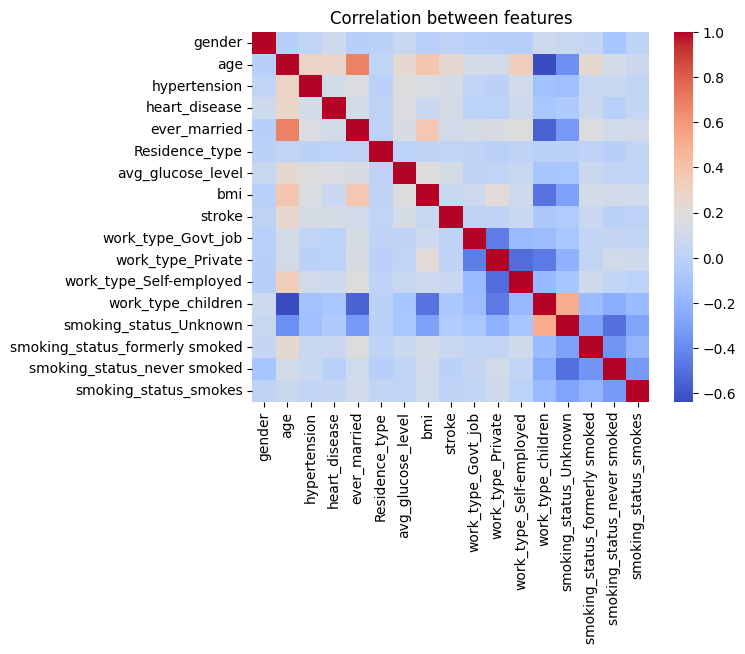

In [9]:
# Correlation between features and stroke
corr_matrix = df.corr()
# Create a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation between features')
plt.show()

### Effect of age on brain stroke
It seems there is a slight correlation between age and stroke. We can visulize it with more details.

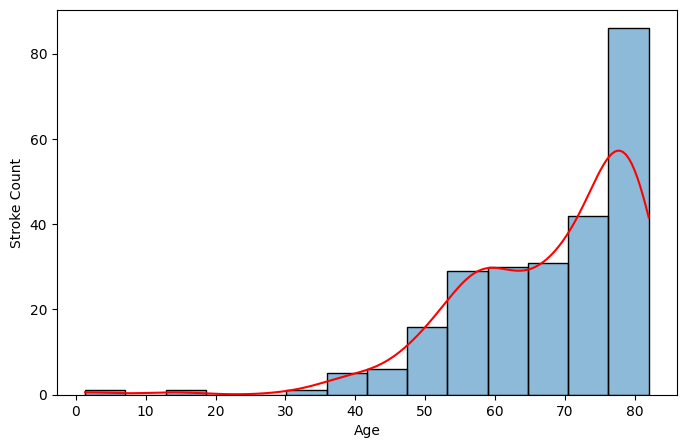

In [10]:
plt.figure(figsize=(8,5))
ax = sns.histplot(x=df['age'][df['stroke']==1], kde=True)
plt.xlabel('Age')
plt.ylabel('Stroke Count')
ax.lines[0].set_color('red')
plt.show()

As we can see, the stroke count will be increase in higher ages.

### Effect of hypertension on brain stroke

In [11]:
stroke_hyperplus = df[(df['stroke']==1) & (df['hypertension']==1)]
stroke_hyperneg = df[(df['stroke']==1) & (df['hypertension']==0)]

perc_stroke_hyperplus = len(stroke_hyperplus)/(len(df[df['hypertension']==1])) * 100
perc_stroke_hyperneg = len(stroke_hyperneg)/(len(df[df['hypertension']==0])) * 100

print(f"stroke in people with hypertension is {round(perc_stroke_hyperplus, 2)}%")
print(f"stroke in people without hypertension is {round(perc_stroke_hyperneg, 2)}%")

stroke in people with hypertension is 13.78%
stroke in people without hypertension is 4.04%


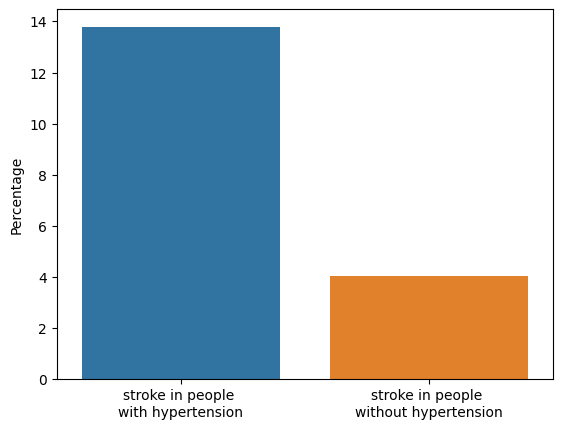

In [12]:
sns.barplot(x=["stroke in people \nwith hypertension", 'stroke in people \nwithout hypertension'],
            y=[perc_stroke_hyperplus, perc_stroke_hyperneg])
plt.ylabel('Percentage')
plt.show()

The percentage of brain stroke is higher in people with hypertension compared to people without hypertension based on this dataset.

### Effect of glucose level on brain stroke

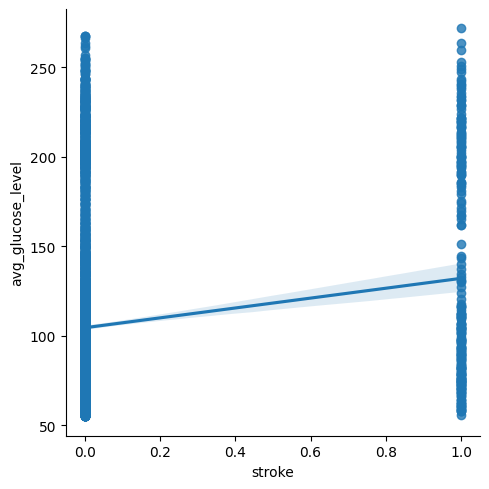

In [13]:
sns.lmplot(x='stroke', y='avg_glucose_level', data=df)
plt.show()

As we can see in the above plot, compared to individuals with normal glucose levels, those with high glucose levels or at risk of diabetes are more prone to experiencing strokes.

### Brain stroke in men and women

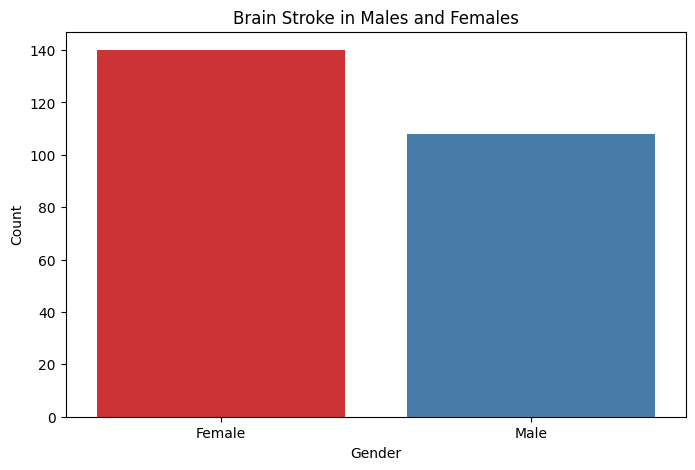

In [14]:
plt.figure(figsize=(8, 5))

ax = sns.countplot(x=df['gender'][df['stroke']== 1], palette='Set1')

ax.set_xticklabels(['Female', 'Male'])
plt.title('Brain Stroke in Males and Females')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

As we can see in this barplot, women are more likely to have a stroke than men.

### The relationship between BMI and stroke

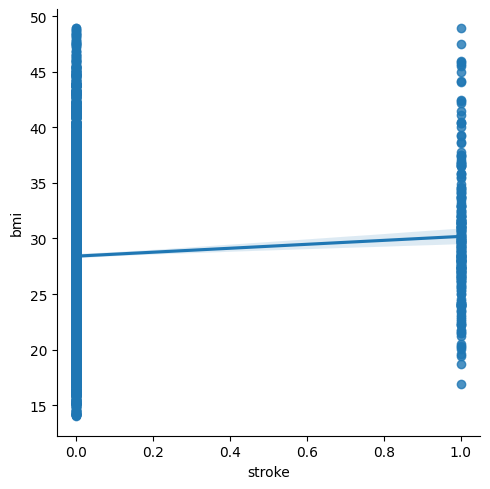

In [15]:
sns.lmplot(x='stroke', y='bmi', data=df)
plt.show()

High BMI (more weight) can also increase the chance of getting a stroke.

## 4. Data Processing

First, let's see how many of our data have had a stroke and how many have not had a stroke.

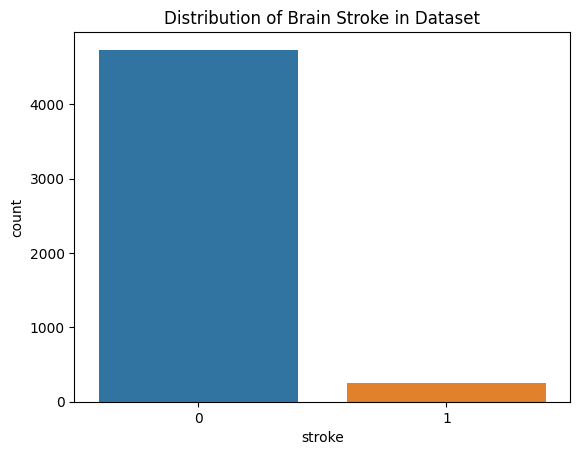

In [16]:
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Brain Stroke in Dataset')

plt.show()

Our data is imbalance and the and people without brain stroke is much higher than people with brain stroke. So we have to balance the data. 

### SMOTE (Synthetic Minority Over-sampling Technique)
SMOTE creates synthetic samples by interpolating between existing minority class samples. It generates synthetic data points along the line segments connecting neighboring minority class instances. This method can help alleviate the issues of oversampling by introducing some variation.

But before using SMOTE, we have to split our dataset to train and test and apply SMOTE to the training data.

In [17]:
# Specify features and result
X = df.drop(['stroke'], axis=1)
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=42)

(y_train.shape, y_test.shape)

((3735,), (1246,))

Before balance:
0    3556
1     179
Name: stroke, dtype: int64


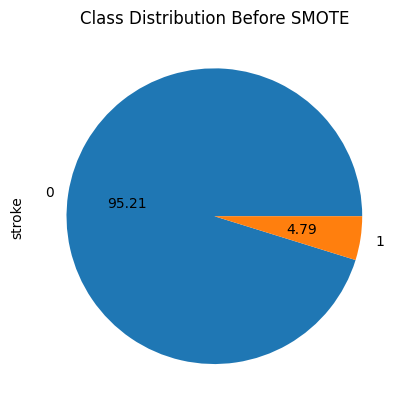


After balance:
0    3556
1    3556
Name: stroke, dtype: int64


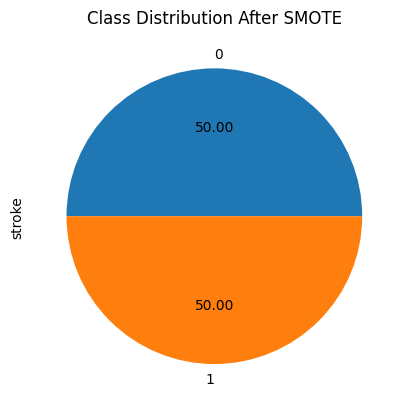

In [18]:
# Balance the imbalance dataset using SMOTE
print('Before balance:')
print(y_train.value_counts())
y_train.value_counts().plot.pie(autopct='%.2f')
plt.title('Class Distribution Before SMOTE')
plt.show()

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print('\nAfter balance:')
print(y_train_sm.value_counts())
y_train_sm.value_counts().plot.pie(autopct='%.2f')
plt.title('Class Distribution After SMOTE')
plt.show()

## 5. XGBoost Model Buliding

**XGBoost** (Extreme Gradient Boosting) is an optimized implementation of the gradient boosting algorithm, which is a popular machine learning technique for regression and classification tasks. XGBoost combines multiple weak predictive models (typically decision trees) in an iterative manner to build a powerful ensemble model.

**GridSearchCV** is a method provided by scikit-learn that allows you to perform an exhaustive search over a specified parameter grid to find the best combination of hyperparameters for a machine learning model.

In [19]:
# Define the parameter grid
param_grid = {
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200, 300]
}

# Create an instance of XGBClassifier
xgb_model = XGBClassifier(objective='binary:logistic', random_state = 42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='average_precision')

# Fit the data to perform the search
grid_search.fit(X_train_sm, y_train_sm)

# Access the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}
Best score:  0.9943626540736229


In [20]:
# Fit model based on the parameters that we gave from GridSearchCV
# Create an instance of XGBClassifier

xgboost_model = XGBClassifier(objective='binary:logistic',
                              n_estimators=300, 
                              max_depth=10,
                              learning_rate=0.1, 
                              random_state=42)

# Fit the data to train the XGBoost model
xgboost_model.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [21]:
# Make predictions on the test data
y_pred = xgboost_model.predict(X_test)

### Model Evaluation

In [22]:
# Predict the test dataset and check the accuracy
print(f'Classification Report \n\n{classification_report(y_test, y_pred)}')

Classification Report 

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1177
           1       0.19      0.07      0.10        69

    accuracy                           0.93      1246
   macro avg       0.57      0.53      0.53      1246
weighted avg       0.91      0.93      0.92      1246



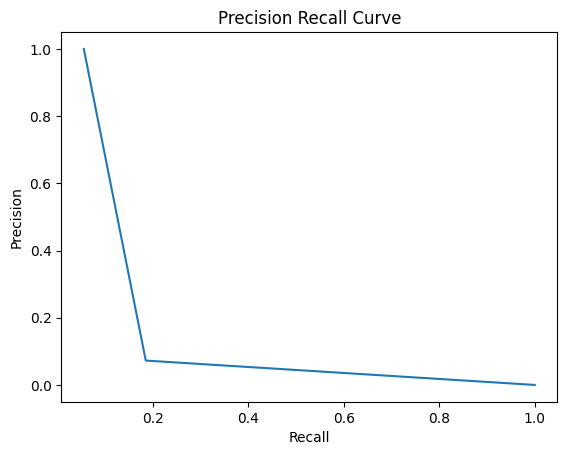

In [23]:
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(lr_precision,lr_recall)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision Recall Curve')
plt.show()

**AUC-PR** stands for Area Under the Precision-Recall Curve. It is a metric used to evaluate the performance of a binary classification model, particularly in cases where the data is imbalanced or the focus is on the positive class.

In [24]:
# Calculate AUC-PR curve
auc_pr = auc(lr_recall, lr_precision)
print("AUC-PR:", auc_pr)

AUC-PR: 0.15450665963611737


In [25]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(y_train_sm, xgboost_model.predict(X_train_sm)):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(y_test, y_pred):.4f}")

Metrics train:
	Accuracy score: 1.0000
Metrics test:
	Accuracy score: 0.9310


The **F1-score** is a measure of a model's accuracy, taking into account both precision and recall. It is particularly useful when dealing with imbalanced datasets or when both precision and recall are important.

In [26]:
f1 = f1_score(y_test, y_pred)
print(f'f1-score : {f1: .4f}. ')

f1-score :  0.1042. 


**True Positive Rate (TPR):** Also known as sensitivity or recall, TPR measures the proportion of correctly predicted positive instances out of all actual positive instances. It represents the model's ability to identify positive cases correctly. TPR is calculated as:

TPR = TP / (TP + FN)

**False Positive Rate (FPR):** FPR measures the proportion of incorrectly predicted negative instances out of all actual negative instances. It represents the model's tendency to classify negative instances as positive incorrectly. FPR is calculated as:

FPR = FP / (FP + TN)

**AUC Score (Area Under the Curve):** AUC is a performance metric that represents the area under the Receiver Operating Characteristic (ROC) curve. The ROC curve plots the TPR (sensitivity) against the FPR (1 - specificity) for different classification thresholds. The AUC score summarizes the performance of the classifier across all possible thresholds, providing a single-value metric.

The AUC score ranges from 0 to 1, with higher values indicating better classification performance.

In [27]:
# Calculate the true positive rate (TPR), false positive rate (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred)

**The ROC (Receiver Operating Characteristic) curve** is a graphical representation of the performance of a binary classification model. It illustrates the relationship between the True Positive Rate (TPR) and the False Positive Rate (FPR) as the classification threshold is varied.



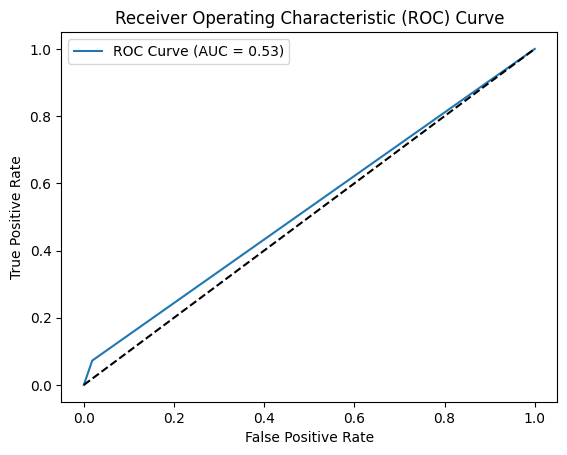

In [28]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## 6. Neural Network Model Building

At first, we normalize the features using `StandardScaler` to ensure that they are on a similar scale.

In [29]:
# Normalize the features
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train_sm)
X_test_norm = scaler.transform(X_test)

Next, we define a neural network model using Keras. The model consists of three hidden layers with 400, 400, and 128 neurons respectively, and ReLU activation. Two dropouts are performed for avoiding overfitting. The output layer has a single neuron with sigmoid activation since we are performing binary classification (stroke or no stroke).

In [30]:
# Build the neural network model
deep_model = Sequential()
deep_model.add(Dense(400,activation='relu', input_shape=(X_train_norm.shape[1],)))
deep_model.add(Dropout(0.5))
deep_model.add(Dense(400,activation='relu'))
deep_model.add(Dropout(0.5))
deep_model.add(Dense(128,activation='relu'))
deep_model.add(Dense(1,activation='sigmoid'))

The model will be compil with binary cross-entropy loss and the Adam optimizer.

In [31]:
# Compile the model
deep_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy', Precision(), Recall()])

We can train the model on the training set using the fit method.

In [32]:
deep_model.fit(X_train_norm, y_train_sm, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
223/223 [==============================] - 3s 7ms/step - loss: 0.2439 - accuracy: 0.8983 - precision: 0.9053 - recall: 0.8898
Epoch 2/10
223/223 [==============================] - 1s 7ms/step - loss: 0.1672 - accuracy: 0.9325 - precision: 0.9532 - recall: 0.9097
Epoch 3/10
223/223 [==============================] - 1s 6ms/step - loss: 0.1585 - accuracy: 0.9346 - precision: 0.9568 - recall: 0.9103
Epoch 4/10
223/223 [==============================] - 1s 7ms/step - loss: 0.1478 - accuracy: 0.9374 - precision: 0.9603 - recall: 0.9125
Epoch 5/10
223/223 [==============================] - 1s 7ms/step - loss: 0.1436 - accuracy: 0.9429 - precision: 0.9621 - recall: 0.9221
Epoch 6/10
223/223 [==============================] - 1s 7ms/step - loss: 0.1418 - accuracy: 0.9447 - precision: 0.9653 - recall: 0.9227
Epoch 7/10
223/223 [==============================] - 1s 7ms/step - loss: 0.1392 - accuracy: 0.9447 - precision: 0.9664 - recall: 0.9215
Epoch 8/10
223/223 [=====================

In [33]:
# Predict using test dataset
y_pred = deep_model.predict(X_test_norm)
y_pred = (y_pred > 0.5).astype(int)

39/39 [==============================] - 0s 2ms/step


### Model Evaluation

In [34]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9253611556982343


In [35]:
# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.18421052631578946
Recall: 0.10144927536231885
F1-Score: 0.1308411214953271


In [36]:
# Predict the test dataset and check the accuracy
print(f'Classification Report \n\n{classification_report(y_test, y_pred)}')

Classification Report 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1177
           1       0.18      0.10      0.13        69

    accuracy                           0.93      1246
   macro avg       0.57      0.54      0.55      1246
weighted avg       0.91      0.93      0.92      1246



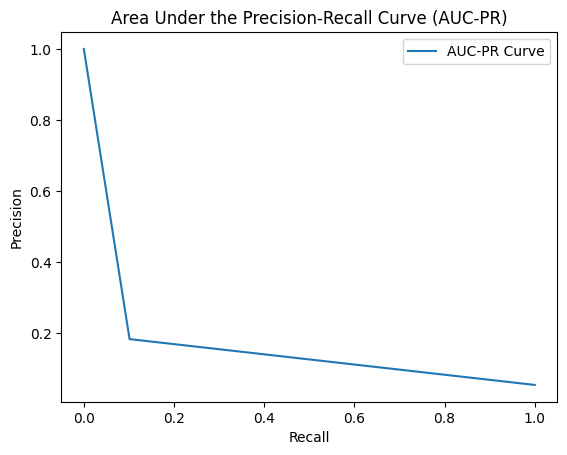

In [37]:
# Plot AUC-PR curve
lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
plt.plot(lr_recall, lr_precision, label='AUC-PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Area Under the Precision-Recall Curve (AUC-PR)')
plt.legend()
plt.show()

In [38]:
# Calculate AUC-PR curve
auc_pr = auc(lr_recall, lr_precision)
print("AUC-PR:", auc_pr)

AUC-PR: 0.16770951560630937


In [39]:
# Calculate the true positive rate (TPR), false positive rate (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred)

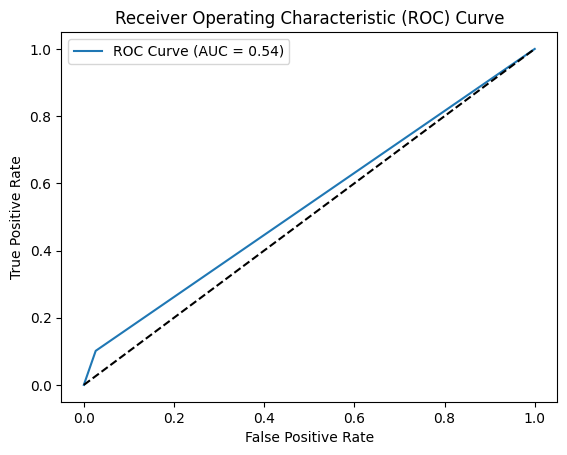

In [40]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## 7. Conclusion

**AUC-PR:** The Neural Network model has a slightly higher AUC-PR score (0.1906) compared to the XGBoost model (0.1545). AUC-PR measures the area under the precision-recall curve and provides an aggregate measure of model performance for imbalanced datasets.

**Precision and Recall:** Both models have high precision and recall for class 0 (no stroke), indicating that they are good at identifying instances of no stroke correctly. However, both models perform poorly for class 1 (stroke), with low precision, recall, and F1-score. This suggests that the models struggle to correctly classify instances of stroke.

**F1-score:** The F1-scores for both classes are low for both models, indicating poor overall performance in capturing the true positive instances for both strokes and no strokes.

**Accuracy:** Both models have the same accuracy of 0.93, which might be misleading due to the class imbalance. High accuracy can be achieved by simply predicting the majority class (no stroke) most of the time.

Overall, both models show suboptimal performance in accurately predicting instances of stroke, as evidenced by low precision, recall, and F1-score for class 1. However, the Neural Network model slightly outperforms the XGBoost model in terms of AUC-PR.